In [2]:
# use this to add moore environments 
# https://medium.com/@nrk25693/how-to-add-your-conda-environment-to-your-jupyter-notebook-in-just-4-steps-abeab8b8d084 
import parselmouth
from IPython.display import Audio

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import music21
import librosa

# import winsound
import time, math
import scipy as sp
import mediapipe as mp
sns.set() # set the good graphing style using sns


ModuleNotFoundError: No module named 'winsound'

In [210]:
NOTES_NAME = ["A", "A#", "B", "C", "C#", "D",
         "D#", "E", "F", "F#", "G", "G#"]
NOTES_DICT = {"A":0, "A#":1, "B":2, "C":3, "C#":4, "D":5,
         "D#":6, "E":7, "F":8, "F#":9, "G":10, "G#":11}
LOWEST_NOTE = 27.50
RESTING_FREQUENCY = 65

class Music_note():
    def __init__(self, duration, frequency=None, note=None):
        if note is None and frequency is None:
            raise Exception("you must enter either note or frequency")
        elif note is None:
            if frequency < 27.50:
                self.note = "N/A"
                self.frequency = 27.50
            else:
                number = int(math.log2(frequency/LOWEST_NOTE) * 12)
                octive = math.floor(number / 12)
                note_id = number % 12
                self.frequency = LOWEST_NOTE * pow(2, number/12.0)
                self.note = NOTES_NAME[note_id] + "{}".format(octive + 1)
        else:
            try:
                octive = int(note[-1]) - 1
                note_id = NOTES_DICT[note[:-1]]
                self.frequency = LOWEST_NOTE * pow(2, (octive*12+note_id) / 12.0)
                self.note = note
            except:
                self.note = "N/A"
                self.frequency = 0
        self.duration = duration
    def print(self, freq=None):
        if freq is None:
            print("freq = ", self.frequency)
            print("note = {}".format(self.note))
        else:
            number = int(math.log2(freq / LOWEST_NOTE) * 12)
            octive = math.floor(number / 12)
            note_id = number % 12
            print("freq = ", freq)
            print(NOTES_NAME[note_id] + "{}".format(octive + 1))
    def play(self):
        if self.note == "N/A":
            time.sleep(self.duration)
        else:
            winsound.Beep(int(self.frequency), int(self.duration * 1000))

# Usage of Parselmouth

In [211]:
filename = "C:\\Users\\evansamaa\\Desktop\\Jali_Experiments\\zombie\\zombie_cover.wav"

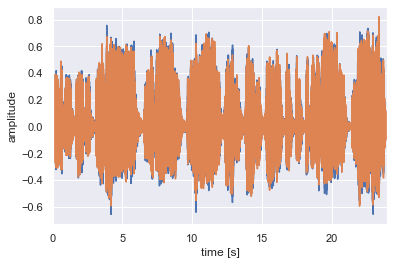

In [212]:
snd = parselmouth.Sound(filename)
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

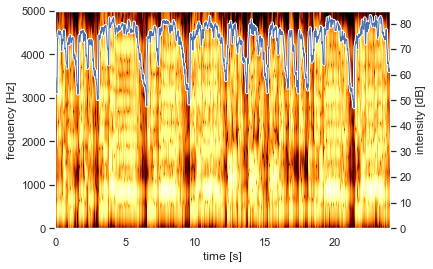

In [213]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

intensity = snd.to_intensity()
spectrogram = snd.to_spectrogram()
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_intensity(intensity)
plt.xlim([snd.xmin, snd.xmax])
plt.show() # or plt.savefig("spectrogram.pdf")

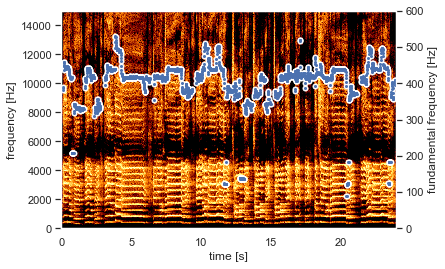

In [214]:
def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

pitch = snd.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=15000)
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([snd.xmin, snd.xmax])
plt.show() # or plt.savefig("spectrogram_0.03.pdf")

In [215]:
# outputing the data
Audio(data=snd.values, rate=snd.sampling_frequency)

In [216]:
print(snd.values.shape) # if this is stereo, it will be of shape (2, N), one for each channel

(2, 1150502)


In [217]:
# plt.plot(np.array(pitch.selected_array))
# plt.show()
playable_pitch = snd.to_pitch(time_step=0.1, pitch_ceiling=1200)
pitch_arr = []
for i in range(0, len(playable_pitch.selected_array)):
    pitch_arr.append(playable_pitch.selected_array[i][0])

# Building a pitch detector using Praat (does not work that well)

In [239]:
time_step = 0.1
window_size = 1.5 # so we are gonna judge one second around each note
vocal_range = 12 # we are gonna assume within a second, you can only cross 1 octaves (24 notes) 
fn = "C:\\Users\\evansamaa\\Desktop\\Jali_Experiments\\zombie\\zombie_cover.wav"
sound = parselmouth.Sound(fn)
pitch = sound.to_pitch(time_step = time_step, pitch_ceiling = 2000)
intensity = sound.to_intensity(time_step=time_step)

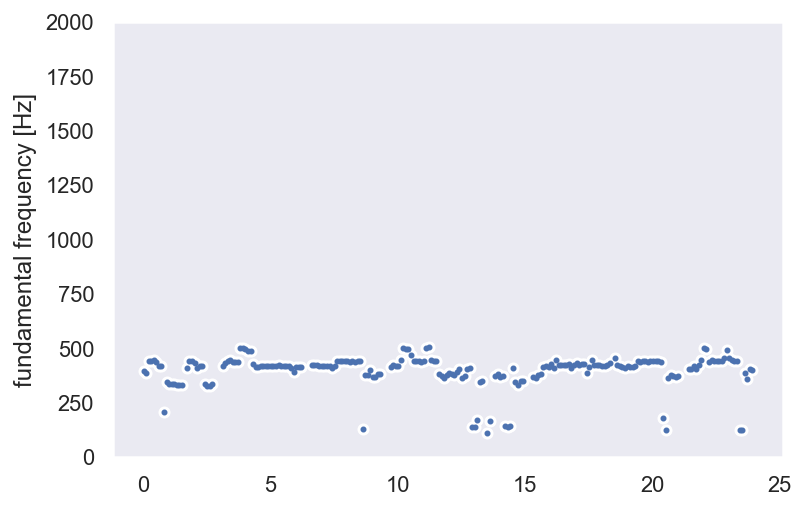

In [240]:
draw_pitch(pitch)

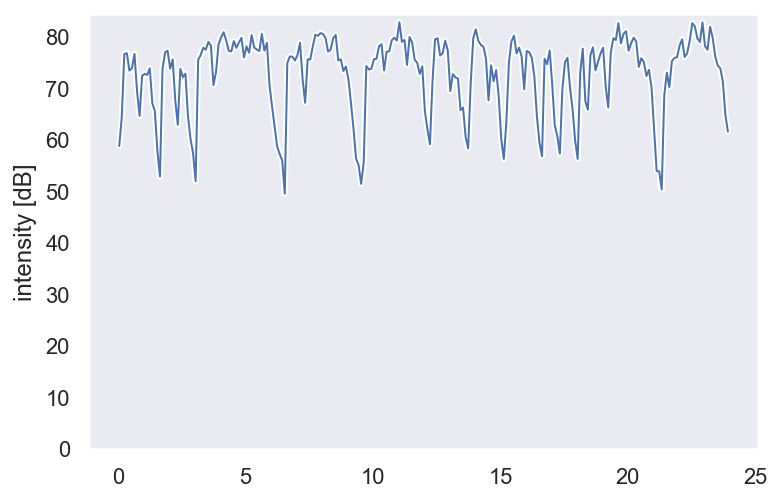

In [241]:
draw_intensity(intensity)

In [242]:
# for i in range(len(avg_pitch_arr)):
#     if int(avg_pitch_arr[i]) >= 37:
#         winsound.Beep(int(avg_pitch_arr[i]), 100)
#     else:
#         time.sleep(0.10)

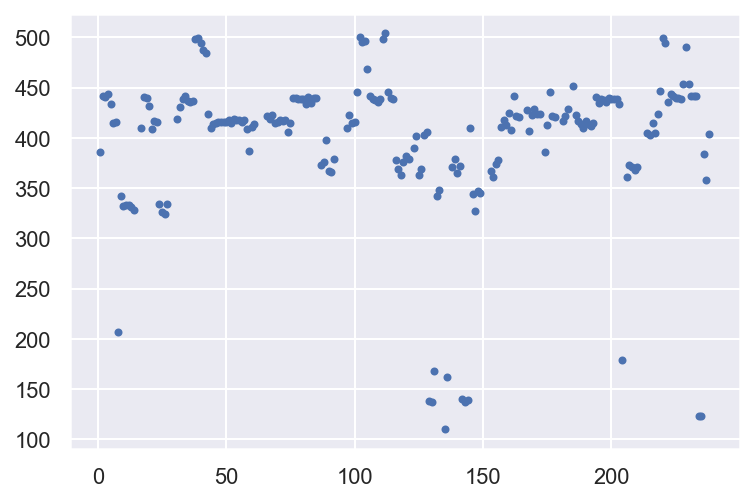

In [243]:
note_arr = []
# print(intensity.values.shape)
# print(pitch.selected_array.shape)
pitch_arr = []
cts_pitch_arr = []
prev = 0
for i in range(0, len(pitch.selected_array)-1):
    p = pitch.selected_array[i]
    intensity_i = intensity.values[0, i]
    if intensity_i >= 60 and p[0] >= LOWEST_NOTE:
        note_arr.append(Music_note(time_step, frequency=p[0]))
        pitch_arr.append(p[0])
        cts_pitch_arr.append(p[0])
        prev = p[0]
    else:
        note_arr.append(Music_note(time_step, 0))
        pitch_arr.append(np.nan)
        cts_pitch_arr.append(prev)
pitch_arr = np.array(pitch_arr)
avg_pitch_arr = np.convolve(cts_pitch_arr, np.ones(int(window_size/time_step)), 'same') / (window_size/time_step)
log_avg_pitch_arr = np.where(avg_pitch_arr <= -1, np.nan, np.log(avg_pitch_arr / LOWEST_NOTE)) * 12
log_pitch_arr = np.log(pitch_arr / LOWEST_NOTE) * 12
# we will remove anything that is too far from the moving averag
# print(np.abs((log_pitch_arr - log_avg_pitch_arr)) <= vocal_range)
pitch_arr = np.where(np.abs((log_pitch_arr - log_avg_pitch_arr)) <= vocal_range, pitch_arr, np.nan)
plt.plot(pitch_arr,  marker='.', linestyle = '')
plt.show()

# playing with music21 instead for pitch detection

In [222]:
fn = "C:\\Users\\evansamaa\\Desktop\\Jali_Experiments\\zombie\\zombie_cover.wav"

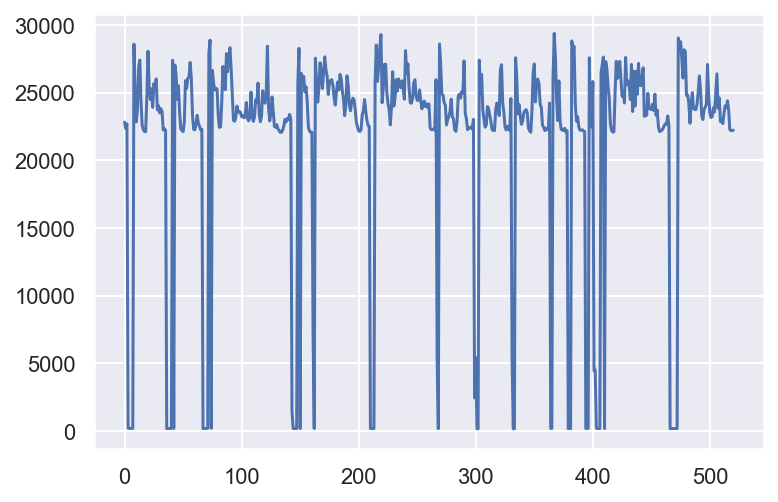

[22831.072495502405, 22351.487071851334, 22699.198771259747, 208.04844843105235, 206.37537838491448, 202.3769246116712, 202.53755994956796, 202.5638735713209, 28589.929281090084, 24948.102499537432, 22838.73250526314, 23732.761717564787, 26892.449316689377, 27418.112729187316, 24431.050842057506, 22609.2638983304, 22255.891779726648, 22137.198488835485, 22111.97828509246, 24617.282096312847, 28065.747021037758, 25456.61246982924, 24500.344495520072, 25290.964307961745, 23912.977946561445, 25671.188163346527, 25312.567617481618, 26020.00779459719, 23728.863452664402, 24044.566623744246, 23509.70076681607, 23813.62352988825, 23608.812170267942, 22248.31857800527, 22346.28255969987, 22217.807312686426, 188.49717421568536, 189.91164950176295, 186.95040648222744, 200.10616428887, 200.7703021230662, 27399.37281527227, 202.39296525627, 27049.89477899866, 26319.947930766284, 24504.139427578317, 25510.48436484345, 23554.428759749248, 22341.675378644104, 22218.586079881476, 22118.340417687366, 2

In [228]:
samples, sampling_rate = librosa.load(fn)
music21.audioSearch.audioChunkLength = int(sampling_rate * 0.1)
freq = music21.audioSearch.getFrequenciesFromAudioFile(waveFilename=fn)
plt.plot(freq)
plt.show()
print(freq)

# Audio Processing Stuff

In [ ]:
import librosa

In [ ]:
samples, sampling_rate = librosa.load(filename)

In [ ]:
duration = len(samples) / sampling_rate

In [ ]:
print(snd.values.shape)